# Group 7 Group Project
 
## Predictive Analysis: Prediction & Matching of Refugee Influx to Job Demands with the Purpose of Providing Settlement and Employment.  

# 1. CRISP-DM - Business Understanding.

## 1.1 Problem Statement:

Refugees are in need of acceptance into asylum countries to which refugees could settle down, and employment opportunity.

There are multiple countries that provide asylum. If all refugees focus on going to one country, they will quickly exhaust the resources available from that country that was allocated for the refugees.

What we want to do to solve this problem is predict how many refugees will flow into a country and job demand in those countries. Then matching the number of refugees with job demand. If there is a gap, then providing guidance for increasing intake and job opportunities in those countries.

## 1.2 Objective: 
The research aims to provide 

1. a prediction on refugee influx each year​
2. a prediction of demand for employment the asylum countries to which refugees can fulfill

The above predictions aims to match and provide data-driven insights to assist in improving lives of refugees.

*Note: The datasets to be searched for,
1. Historical Refugee Numbers & Relevant Parameters (ie. Economic, Social & Legal) 
2. Historical Asylum Countries' Refugee Intake Numbers 
3. Asylum Countries Labour Market Data. 

# 2. CRISP-DM - Data Understanding

## 2.1 Datasets: 

### Initial collected datasets

1. https://www.unhcr.org/refugee-statistics/
2. https://www.kaggle.com/datasets/unitednations/refugee-data
3. https://www.unhcr.org/data.html
4. https://www.unhcr.org/refugee-statistics/methodology/
5. https://reporting.unhcr.org/#_ga=2.15208630.1238382503.1667656093-1972231935.1667656093
6. https://rs.io/100-interesting-data-sets-for-statistics/
7. https://www.reddit.com/r/datasets/
8. https://data.europa.eu/en
9. https://data.gov.au/search?q=unemployement
10. https://data.gov.sg/
11. https://www.unhcr.org/5273a9e89.pdf 

### Shortlisted datasets

1. https://microdata.unhcr.org/index.php/catalog/681/study-description#metadata-data_collection (Refugee information in the US)
2. https://www.bls.gov/charts/job-openings-and-labor-turnover/opening-hire-seps-level.htm (Job Openings in the US)

Additional statistics collected after analysing original dataset
2. https://www.macrotrends.net/countries/DEU/germany/refugee-statistics

3. https://www.macrotrends.net/countries/USA/united-states/refugee-statistics

4. https://www.macrotrends.net/countries/FRA/france/refugee-statistics

5. https://www.macrotrends.net/countries/CAN/canada/refugee-statistics

6. https://data.bls.gov/PDQWeb/ln (LabourForceParticipationRate Dataset)




## 2.2 Data Understanding: Exploratory Data Analysis

How many datapoints.

Main features/labels.

Average values (mean, range etc.)

Initial gap finding. How many refugees versus how many intake currently.

Any missing data or inconsistency.

### 2.2.1 ASR dataset 
### In this dataset we hope we can explore whether these refugees need work. 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import re
import os

In [4]:
df_raw = pd.read_csv('ASR.csv')
print(df_raw.shape)
df_raw

(4905, 265)


,Variable,hhid,personid,respondent,cohort,qn1a,numppl,qn1b,qn1c,qn1d,...,qn34b_05,ui_qn8a_annual,ui_qn10a_annual,ui_cashassist,ui_lfp,ui_emprate,ui_medicaidrma,ui_lpr,ui_school,ui_work
0,NaN,2,22,0,3,2,5,11,NaN,998.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,23,0,3,3,5,11,NaN,998.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,25,0,3,5,5,11,NaN,7.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2,24,0,3,4,5,11,NaN,8.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2,21,1,3,1,5,1,4.0,30.0,...,NaN,NaN,NaN,2,1.0,1.0,1.0,2.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,NaN,9327,93272,0,1,2,4,2,1.0,998.0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4901,NaN,9332,93322,0,1,2,4,2,1.0,27.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4902,NaN,9332,93321,1,1,1,4,1,1.0,28.0,...,NaN,NaN,NaN,2,2.0,3.0,2.0,1.0,0.0,2.0
4903,NaN,9332,93323,0,1,3,4,4,NaN,3.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Count the number of missing values in each column
df_raw.isnull().sum()

Variable          4905
hhid                 0
personid             0
respondent           0
cohort               0
                  ... 
ui_emprate        1876
ui_medicaidrma    1876
ui_lpr            1877
ui_school         2036
ui_work           1880
Length: 265, dtype: int64

In [ ]:
df_raw.describe()

,Variable,hhid,personid,respondent,cohort,qn1a,numppl,qn1b,qn1c,qn1d,...,qn34b_05,ui_qn8a_annual,ui_qn10a_annual,ui_cashassist,ui_lfp,ui_emprate,ui_medicaidrma,ui_lpr,ui_school,ui_work
count,0.0,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000,3548.000000,4905.000000,...,87.000000,310.000000,4.000000,4905.000000,3029.000000,3029.000000,3029.000000,3028.000000,2869.000000,3025.000000
mean,NaN,4431.881753,44321.274618,0.307034,2.061366,2.457085,3.914169,3.538634,2.500846,112.844139,...,0.114943,852830.658065,20000.000000,9.701121,6.646088,7.095081,57.842192,13.358653,20.101778,5.712727
std,NaN,2628.216882,26282.184546,0.461310,0.815396,1.301055,1.223651,4.653204,1.814874,271.809867,...,0.320802,344996.814404,16227.548593,88.577389,72.328325,72.300147,230.251282,109.644367,138.149768,62.702026
min,NaN,2.000000,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,9500.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,2167.000000,21672.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,17.000000,...,0.000000,999998.000000,9250.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,NaN,4349.000000,43493.000000,0.000000,2.000000,2.000000,4.000000,4.000000,1.000000,31.000000,...,0.000000,999998.000000,22500.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000
75%,NaN,6727.000000,67274.000000,1.000000,3.000000,3.000000,5.000000,4.000000,4.000000,47.000000,...,0.000000,999998.000000,33250.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,3.000000
max,NaN,9332.000000,93324.000000,1.000000,3.000000,5.000000,5.000000,99.000000,9.000000,999.000000,...,1.000000,999999.000000,34000.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


Text(0.5, 1.0, 'when did this person get his/her first job in the u.s.?')

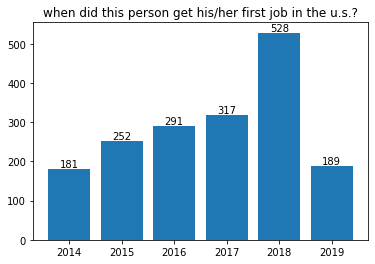

In [ ]:
#when did this person get his/her first job in the u.s.?
result = df_raw['qn18dyear'].value_counts()
x=result.index
y=result
for a,b in zip(x, y):
     plt.text(a, b, b, ha='center', va='bottom')
plt.bar(x, y)
plt.title('when did this person get his/her first job in the u.s.?')


Text(0.5, 1.0, 'what month and year did this person enter the u.s. to stay?')

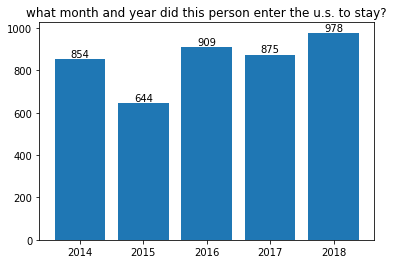

In [ ]:
result = df_raw['qn1jyear'].value_counts()
x=result.index
y=result
for a,b in zip(x, y):
     plt.text(a, b, b, ha='center', va='bottom')
plt.bar(x, y)
plt.title('what month and year did this person enter the u.s. to stay?')

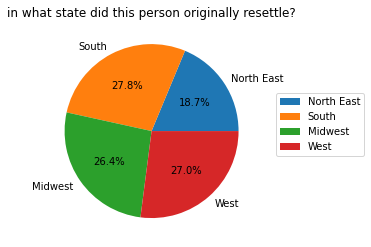

In [ ]:
import pylab as pl
#in what state did this person originally resettle?

piedata={"North East":0,"South":0,"Midwest":0,"West":0}
for i in df_raw['qn1k']:
    if i==1: piedata["North East"]+=1
    if i==2 : piedata["South"]+=1
    if i==3 : piedata["Midwest"]+=1
    if i==4 : piedata["West"]+=1

pl.pie(piedata.values(),labels=piedata.keys(),autopct='%3.1f%%')

pl.legend(bbox_to_anchor=(1, -0.3, 0.5, 1))
pl.title('in what state did this person originally resettle?')
pl.show()

### 2.2.2 Multi-country dataset

### In this datase we hope to make predictions about the future number of open asylums in the US

In [ ]:
df_mul = pd.read_csv('mul_country.csv')
print(df_mul.shape)
df_mul.describe()

(62, 9)


,us_Refugees_Granted_Asylum,us_AnnualChange,Ge_Asylum,Ge_AnnualChange,France_Refugees,Fr_AnnualChange,Canada_Refugees,Canada_AnnualChange
count,62.000000,61.000000,6.200000e+01,61.000000,62.000000,61.000000,62.000000,61.000000
mean,472171.370968,1.382951,5.445676e+05,7.639180,187780.354839,1.648689,98859.193548,4.441967
std,135204.167877,20.920986,4.218515e+05,41.137472,80706.213650,9.394454,58751.952488,23.861587
min,262006.000000,-66.670000,8.350000e+04,-68.200000,98900.000000,-32.990000,9980.000000,-72.400000
25%,368736.750000,-2.610000,1.250000e+05,-2.630000,137950.000000,-1.020000,29976.500000,-6.600000
50%,500000.000000,0.000000,5.752690e+05,0.080000,172631.500000,2.960000,113533.500000,2.430000
75%,530000.000000,3.750000,9.052500e+05,8.050000,196095.000000,6.710000,145723.500000,7.850000
max,843434.000000,122.350000,1.418000e+06,275.200000,499914.000000,21.200000,186555.000000,85.060000


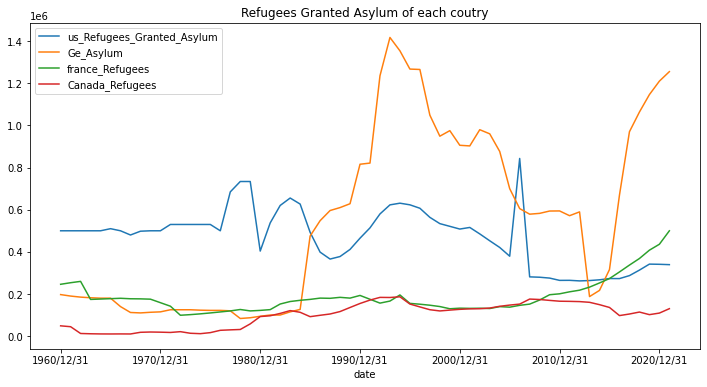

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
df_mul.plot(x='date',y=['us_Refugees_Granted_Asylum','Ge_Asylum','France_Refugees','Canada_Refugees'],figsize=(12,6),title='Refugees Granted Asylum of each coutry')

We get the number of asylum openings each year in four countries.

### 2.2.3 Additional yearly data
### In this dataset we expect to predict whether there is a job gap in the US.

In [ ]:
data = pd.read_csv('data3.csv',index_col=0)
print(data.shape)
data.T.describe()

(11, 12)


year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,63.700000,63.258333,62.883333,62.658333,62.800000,62.850000,62.883333,63.108333,61.741667,61.658333,62.241667
std,0.095346,0.250303,0.083485,0.156428,0.104447,0.124316,0.126730,0.144338,0.930746,0.206522,0.079296
min,63.500000,62.800000,62.800000,62.400000,62.700000,62.700000,62.600000,62.900000,60.100000,61.300000,62.100000
25%,63.675000,63.150000,62.800000,62.575000,62.700000,62.775000,62.875000,63.000000,61.475000,61.500000,62.200000
50%,63.700000,63.300000,62.900000,62.650000,62.800000,62.850000,62.900000,63.100000,61.500000,61.700000,62.200000
75%,63.800000,63.400000,62.900000,62.725000,62.900000,62.900000,63.000000,63.225000,61.925000,61.800000,62.300000
max,63.800000,63.700000,63.100000,62.900000,63.000000,63.100000,63.000000,63.300000,63.300000,62.000000,62.400000


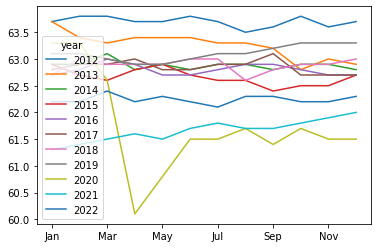

In [ ]:
data.T.plot()

We can see the employment gap trend throughout the year. From the figure, we can see that the employment gap in recent years has decreased compared with previous years.

we found a lot of data and we focused on what it contained and what values were missing etc. We need to determine which data need data cleaning or data integration  work and determine how they contribute to our research objectives. For example, you can see in the first file that it has a shape of (4905, 265) and a lot of missing values.


# 3. Data Preparation

Select data - We will choose some parameters of refugee info. We will also take the country asylum numbers and jobs numbers (time series)

Clean data - find null or N/A and do imputation or deletion






## 3.1 Data Selection

In [ ]:
# We select the correct dataset fore the cleaning
df = pd.read_csv("Original_dataset_WQD7003.csv")

C:\Users\Revi\AppData\Local\Temp\ipykernel_9264\1237420172.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [ ]:
# We try to see the data
df

,Variable,hhid,personid,respondent,cohort,qn1a,numppl,qn1b,qn1c,qn1d,...,qn34b_05,ui_qn8a_annual,ui_qn10a_annual,ui_cashassist,ui_lfp,ui_emprate,ui_medicaidrma,ui_lpr,ui_school,ui_work
0,Label,unique household id,unique person id,binary indicator: survey respondent or househo...,cohort of arrival in us,"1a. let's start with you. not counting you, te...",number of people in household (up to 5),1b. what is this person's relationship to the ...,1c. what is this person's current marital status?,1d. what was this person's age at last birthday?,...,34b. which household members received such ass...,ui: qn8a responses converted to annual earnings,ui: qn10a responses converted to annual earnings,ui: household receipt of cash assistance,ui: labor force participation,ui: employment rate,ui: receipt of rma/medicaid,ui: legal permanent residency status,ui: adults' education pursuit in the u.s.,ui: work status
1,NaN,2,22,0,3,2,5,11,NaN,998.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,23,0,3,3,5,11,NaN,998.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2,25,0,3,5,5,11,NaN,7.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2,24,0,3,4,5,11,NaN,8.00,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,NaN,9327,93272,0,1,2,4,2,1.0,998.0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4902,NaN,9332,93322,0,1,2,4,2,1.0,27.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4903,NaN,9332,93321,1,1,1,4,1,1.0,28.0,...,NaN,NaN,NaN,2,2.0,3.0,2.0,1.0,0.0,2.0
4904,NaN,9332,93323,0,1,3,4,4,NaN,3.0,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# After some analysis we have selected 12 column names as only these are related to our study
df_related = df[['qn1d','qn1f','qn1c','qn1h','qn2b','qn3b','qn4b','qn4c','qn4e','qn1jyear','ui_lpr','ui_work']]

In [ ]:
# we try to see the new dataset created
df_related

,qn1d,qn1f,qn1c,qn1h,qn2b,qn3b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
0,1d. what was this person's age at last birthday?,1f. is this person male or female?,1c. what is this person's current marital status?,1h. what is this person's country of citizenship?,2b. what was the highest degree or certificate...,3b. what kind of work (activities) did this pe...,4b. how well does this person speak english now?,4c. before coming to the u.s. did this person ...,"4e. within the past 12 months, has this person...",1j. what month and year did this person enter ...,ui: legal permanent residency status,ui: work status
1,998.00,2,NaN,98,NaN,NaN,NaN,NaN,NaN,2014,NaN,NaN
2,998.00,1,NaN,98,NaN,NaN,NaN,NaN,NaN,2014,NaN,NaN
3,7.00,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.00,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.0,97,NaN,NaN,NaN,NaN,NaN,2015.0,NaN,NaN
4902,27.0,1,1.0,24,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NaN
4903,28.0,2,1.0,3,6.0,97.0,2.0,2.0,2.0,2015.0,1.0,2.0
4904,3.0,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.2 Data Cleaning

In [ ]:
# Display the number of null values in the dataset
total_null_values = df_related.isnull().sum()
total_null_values

qn1d           0
qn1f           0
qn1c        1357
qn1h           0
qn2b        1876
qn3b        2826
qn4b        1876
qn4c        1876
qn4e        1876
qn1jyear     645
ui_lpr      1877
ui_work     1880
dtype: int64

In [ ]:
# Also the percentage of the null values
tnl_percentage = 100 * df_related.isnull().sum() / len(df_related)
tnl_percentage

qn1d         0.000000
qn1f         0.000000
qn1c        27.660008
qn1h         0.000000
qn2b        38.238891
qn3b        57.602935
qn4b        38.238891
qn4c        38.238891
qn4e        38.238891
qn1jyear    13.147167
ui_lpr      38.259274
ui_work     38.320424
dtype: float64

In [ ]:
# the column which has more than 50% of data missing is omitted.
df_related.isnull().mean()
df_related.columns[df_related.isnull().mean() < 0.5]
df_sc = df_related[df_related.columns[df_related.isnull().mean() < 0.5]]
df_sc

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
0,1d. what was this person's age at last birthday?,1f. is this person male or female?,1c. what is this person's current marital status?,1h. what is this person's country of citizenship?,2b. what was the highest degree or certificate...,4b. how well does this person speak english now?,4c. before coming to the u.s. did this person ...,"4e. within the past 12 months, has this person...",1j. what month and year did this person enter ...,ui: legal permanent residency status,ui: work status
1,998.00,2,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
2,998.00,1,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
3,7.00,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.00,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.0,97,NaN,NaN,NaN,NaN,2015.0,NaN,NaN
4902,27.0,1,1.0,24,NaN,NaN,NaN,NaN,2014.0,NaN,NaN
4903,28.0,2,1.0,3,6.0,2.0,2.0,2.0,2015.0,1.0,2.0
4904,3.0,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Columns that has more than 20% of data missing will be filled in by the average value.
# but first we need to remove the first row as it contains text information and see data types
df_sc1 = df_sc.iloc[1:]
df_sc1

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
1,998.00,2,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
2,998.00,1,NaN,98,NaN,NaN,NaN,NaN,2014,NaN,NaN
3,7.00,2,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.00,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30.00,2,4,3,5,2,2,2,2018,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.0,97,NaN,NaN,NaN,NaN,2015.0,NaN,NaN
4902,27.0,1,1.0,24,NaN,NaN,NaN,NaN,2014.0,NaN,NaN
4903,28.0,2,1.0,3,6.0,2.0,2.0,2.0,2015.0,1.0,2.0
4904,3.0,1,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#convert object to numeric
# df_sc_meanFilled[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']] = df_sc_meanFilled[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].fillna(df_sc_meanFilled[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].mean)
dfv2 = df_sc1.apply(pd.to_numeric, errors='coerce')
dfv2.dtypes

qn1d        float64
qn1f          int64
qn1c        float64
qn1h          int64
qn2b        float64
qn4b        float64
qn4c        float64
qn4e        float64
qn1jyear    float64
ui_lpr      float64
ui_work     float64
dtype: object

In [ ]:
# Now we fill the values with mean
dfv2[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']] = dfv2[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].fillna(value = dfv2[['qn1c','qn2b','qn4b','qn4c','qn4e','ui_lpr','ui_work']].mean())
dfv2

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
1,998.0,2,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
2,998.0,1,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
3,7.0,2,2.500846,24,8.889072,2.589303,1.382965,1.585342,NaN,13.358653,5.712727
4,8.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,NaN,13.358653,5.712727
5,30.0,2,4.000000,3,5.000000,2.000000,2.000000,2.000000,2018.0,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.000000,97,8.889072,2.589303,1.382965,1.585342,2015.0,13.358653,5.712727
4902,27.0,1,1.000000,24,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
4903,28.0,2,1.000000,3,6.000000,2.000000,2.000000,2.000000,2015.0,1.000000,2.000000
4904,3.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,NaN,13.358653,5.712727


In [ ]:
# Now as qn1jyear has less than 20% of data missing and the data will be more correct if it is filled by the median of the column
dfv2['qn1jyear'] = dfv2['qn1jyear'].fillna(value = dfv2['qn1jyear'].median())
dfv2.isnull().sum()

qn1d        0
qn1f        0
qn1c        0
qn1h        0
qn2b        0
qn4b        0
qn4c        0
qn4e        0
qn1jyear    0
ui_lpr      0
ui_work     0
dtype: int64

In [ ]:
# Now the dataset is filled with appropriate data
dfv2

,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
1,998.0,2,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
2,998.0,1,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
3,7.0,2,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
4,8.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
5,30.0,2,4.000000,3,5.000000,2.000000,2.000000,2.000000,2018.0,2.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
4901,998.0,2,1.000000,97,8.889072,2.589303,1.382965,1.585342,2015.0,13.358653,5.712727
4902,27.0,1,1.000000,24,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
4903,28.0,2,1.000000,3,6.000000,2.000000,2.000000,2.000000,2015.0,1.000000,2.000000
4904,3.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727


In [ ]:
# Now save the data to csv file
dfv2.to_csv('clean_Data_11.csv')

# 4 Modeling & Evaluation

### Initial proposed modeling steps:
1. Regression based on time-series (main factor)
2. Variance based on refugee class (secondary factor)
3. Time-series regression of country influx of refugees (LSTM vs ARIMA [Final Decision on Arima]) 
4. Time-series regression of gap in labour force (ARIMA vs SARIMAX [Final Decision on SARIMAX]) 
5. Classification Modelling to fit unemployed refugees into gap in labour force (Decision Tree) 

### Note: A need for a pivot

During our mid semester proposal, we did not realize that we can't use all the data in the ASR file, to predict future unemployment. Since we hadn't learned about ML algorithms yet.

Then we found out how ML works.

The ASR dataset can only train the ML to classify/predict another person's unemployment if we can provide all the other factor data. Which we don't have for future years. So, now we have to simplify our approach and only calculate percentage unemployment from the ASR file. 

1. Time-series regression of local labour gap (people searching for jobs) in USA (SARIMAX model)
2. Time-series regression of country influx of refugees (LSTM vs ARIMA [Final Decision on Arima])
3. Refugee employment need estimation (simple percentage from ASR data)
4. Total job needs in USA, for local labour force and refugees combined.



## 4.1 Labour Force Non-participation Rate Prediction. 

In order to understand the gap to which refugees can fill in the labour market, a prediction of the labour market gap is conducted using the SARIMAX Model to take into consideration of the seasonality of the data as the labour market could be observed to be cyclical [(Crane et al, 2021)](https://www.sciencedirect.com/science/article/abs/pii/S0304407622000616)

The Labour Force Participation Rate was chosen as the indicator as it indicates the relative amount of manpower for the productivity of the nation [(Hipple, 2016)](https://www.bls.gov/opub/mlr/2016/article/pdf/labor-force-participation-what-has-happened-since-the-peak.pdf), hence the gap from the prediction is the gap to which refugees could fill in to narrow down the gap (to reach the supply & demand equilibrium of the labour market). 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#### This code is not used when compiled locally.  
##Then we upload the files 
##from google.colab import files
##uploaded = files.upload()

In [ ]:
#Import the files into a dataframe
import io
df2 = pd.read_excel('cpsaat35.xlsx')

In [ ]:
df2

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2012,24121,24050,24660,24056,24578,24463,23454,24116,23624,23899,24494,24094.000000
1,2013,24476,24729,24411,24955,25507,24862,24797,25650,25772,25211,25232,25328.000000
2,2014,25405,26255,26300,27073,27229,27927,28163,28553,28737,29082,27959,29166.000000
3,2015,29430,29776,29709,30288,29893,29553,30890,30165,30641,31055,31106,31960.000000
4,2016,31457,31853,32056,31237,31053,31046,31632,31167,31056,30711,31591,31561.000000
5,2017,31683,31687,31797,31694,31892,33559,32924,33093,32866,33540,32850,32716.000000
6,2018,33610,33775,34564,34597,35329,35740,35538,35672,35618,36429,36938,36107.000000
7,2019,36229,35444,35753,36574,35657,35574,36287,35839,36136,36127,35325,35474.000000
8,2020,36303,35973,53289,39199,35297,35923,34423,32615,33423,35017,35334,35098.000000
9,2021,34832,37198,38934,40648,40912,42511,44712,44268,44676,45110,45874,45993.000000


In [ ]:
#Get average of "Jan" to "Dec" Column into a new colume into a new DF
average = df2.loc[:,'January':'December'].mean(axis=1)
average_df = pd.DataFrame(average, columns=["average"])
average_df['Year'] = df2["Year"]
average_df

,average,Year
0,24134.083333,2012
1,25077.500000,2013
2,27654.083333,2014
3,30372.166667,2015
4,31368.333333,2016
5,32525.083333,2017
6,35326.416667,2018
7,35868.250000,2019
8,36824.500000,2020
9,42139.000000,2021


In [ ]:
average_df = average_df.reindex(columns=['Year','average'])
average_df

,Year,average
0,2012,24134.083333
1,2013,25077.500000
2,2014,27654.083333
3,2015,30372.166667
4,2016,31368.333333
5,2017,32525.083333
6,2018,35326.416667
7,2019,35868.250000
8,2020,36824.500000
9,2021,42139.000000


In [ ]:
#Column with Average LFPR to fit into SARIMAX Model
import statsmodels.api as sm
rate = average_df['average']

#Fit SARIMAX Model 
model = SARIMAX(rate, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                            average   No. Observations:                   11
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -100.935
Date:                            Mon, 23 Jan 2023   AIC                            211.870
Time:                                    20:13:19   BIC                            213.860
Sample:                                         0   HQIC                           210.616
                                             - 11                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9961      0.184      5.409      0.000       0.635       1.357
ma.L1          1.0000   1.79e+04   

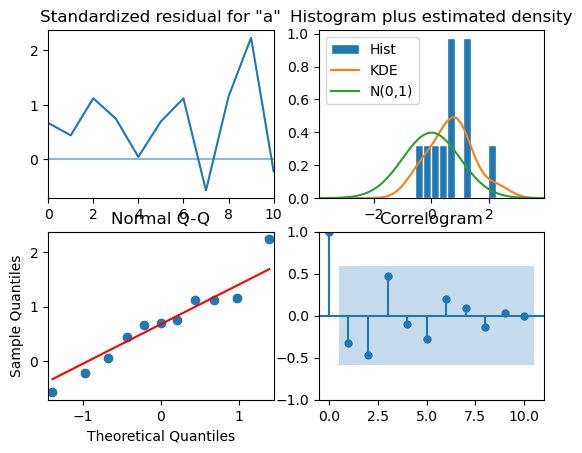

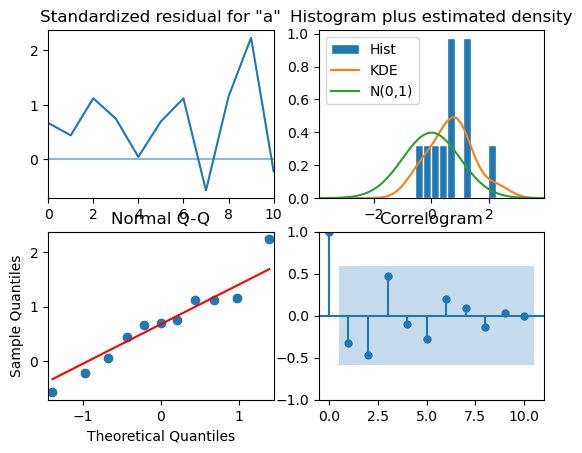

In [ ]:
#Fit Model 
results = model.fit()
print(results.summary())

#Make Predictions on Labour Gap
predictions = model_fit.forecast(steps=11)
# predictions = (100-predictions)*(264127/100)  #Average Working Population
print("\033[1mThe labour gaps starting 2023:\033[0m")
print(predictions)

#Plot Results & Predictions
results.plot_diagnostics()

In [ ]:
#Test against unseen data 
pred = results.get_prediction(start=len(average_df), end=len(average_df)+11)
pred_conf = pred.conf_int()

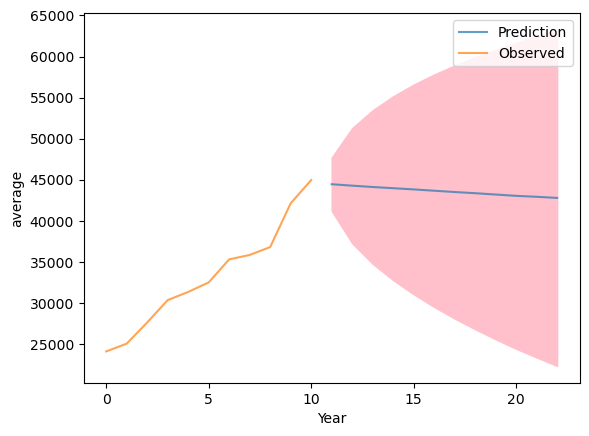

In [ ]:
#Comparison 
import matplotlib.pyplot as plt
average_df["Year"] = average_df.index
fig, ax = plt.subplots()
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7)
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='pink')
average_df['average'].plot(ax=ax, label='Observed', alpha=.7)
ax.set_xlabel('Year')
ax.set_ylabel('average')
plt.legend()
plt.show()

### 4.1.1 Labour Force Non-participation Result Interpretation:
--- 

Prediction of Job Openings: 
The job openings in the US in thousands starting 2023 are as such 

Year  |   Prediction (In Thousands)
<br>
2023: |  44,471
<br>
2024: |   44,303
<br>
2025:  |  44,144
<br>
2026:   | 43,999
<br>
2027:   |43,856
<br>
2028: |   43,699
<br>
2029:  |  43,544
<br>
2030:   | 43,403
<br>
2031:   | 43,244
<br>
2032: |   43,089
<br>
2033:  |  42,972

---

* ar.L1 is 0.9962 with a z-score of 6.087, which means it is statistically significant and its 95% CI is [0.675, 1.317]. 

* The coefficient of ma.L1 is 1.0000 with a z-score of 0, it means it is not statistically significant. 

* The coefficients of ar.S.L12 and ma.S.L12 are not statistically significant as well. 

* The sigma2 coefficient is the variance of the error term. The value of this coefficient is  2.456e+06, indicating that the residuals of the model have a small variance.

---
The model's output supports the statement that the model has a strong autoregressive component, as the coefficient for the first lag of the autoregressive term (ar.L1) is 0.9962 with a z-score of 6.087, which is statistically significant and its 95% CI is [0.675, 1.317], indicating that past values of the time series have a strong effect on the future values.

However, the model's output also shows that the seasonal and moving average components are weak or non-significant. The coefficients for the seasonal part of the model (ar.S.L12 and ma.S.L12) are not statistically significant, meaning that seasonality does not have much effect on the model's ability to predict future values. The coefficient for the first lag of the moving average term (ma.L1) is 1.0000 with a z-score of 0, which means it is not statistically significant, indicating that the errors do not have much effect on the model's ability to predict future values.

The residual variance (sigma2) is 2.456e+06, which is a small value, indicating that the residuals of the model are small and distributed normally.

In summary, the model has a strong autoregressive component, but weak or non-significant seasonal and moving average components. Also, the residuals of the model seem to be small and distributed normally.

## 4.2 Prediction of total refugee numbers

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
import tensorflow
import matplotlib.pyplot as plt

C:\Users\Revi\AppData\Local\Temp\ipykernel_9264\3764171926.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Construction of differential sequences
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# Differential inverse conversion
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# Scaling the data to a number between [-1, 1]
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    print(train)
    #train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    print(train_scaled)
    # transform test
    #test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

#Data inverse scaling
def invert_scale(scaler, X, y):
    new_row = [x for x in X] + [y]
    array = numpy.array(new_row)
    print(array.shape)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# Build an LSTM network model and train
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

# Start single-step prediction
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [ ]:
series = read_excel('united-states-refugee-statistics.xlsx', header=0, index_col=0, squeeze=True)
# Last 12 rows of data as test data
testNum = 12

C:\Users\Revi\AppData\Local\Temp\ipykernel_9264\3095832375.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_excel('united-states-refugee-statistics.xlsx', header=0, index_col=0, squeeze=True)


In [ ]:
series

Date
1960    500000
1961    500000
1962    500000
1963    500000
1964    500000
         ...  
2017    287135
2018    313242
2019    341715
2020    340846
2021    339179
Name:  Refugees Granted Asylum, Length: 62, dtype: int64

In [ ]:
raw_values = series.values
diff_values = difference(raw_values, 1)

In [ ]:
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [ ]:
train, test = supervised_values[0:-testNum], supervised_values[-testNum:]

In [ ]:
scaler, train_scaled, test_scaled = scale(train, test)

[[      0.       0.]
 [      0.       0.]
 [      0.       0.]
 [      0.       0.]
 [      0.   10000.]
 [  10000.  -10000.]
 [ -10000.  -20000.]
 [ -20000.   18000.]
 [  18000.    2000.]
 [   2000.       0.]
 [      0.   30000.]
 [  30000.       0.]
 [      0.       0.]
 [      0.       0.]
 [      0.       0.]
 [      0.  -30000.]
 [ -30000.  184700.]
 [ 184700.   49300.]
 [  49300.       0.]
 [      0. -330316.]
 [-330316.  133691.]
 [ 133691.   82882.]
 [  82882.   35275.]
 [  35275.  -28623.]
 [ -28623. -134103.]
 [-134103.  -94173.]
 [ -94173.  -32907.]
 [ -32907.   12043.]
 [  12043.   33727.]
 [  33727.   53391.]
 [  53391.   48998.]
 [  48998.   66053.]
 [  66053.   43118.]
 [  43118.    7990.]
 [   7990.   -7767.]
 [  -7767.  -16274.]
 [ -16274.  -43192.]
 [ -43192.  -29862.]
 [ -29862.  -12817.]
 [ -12817.  -12925.]
 [ -12925.    7642.]
 [   7642.  -30678.]
 [ -30678.  -32637.]
 [ -32637.  -31748.]
 [ -31748.  -41458.]
 [ -41458.  464104.]
 [ 464104. -562280.]
 [-562280.   

In [ ]:
lstm_model = fit_lstm(train_scaled, 1, 2000, 4)

49/49 [==============================] - 0s 942us/step - loss: 0.0389


49/49 [==============================] - 0s 931us/step - loss: 0.0386


49/49 [==============================] - 0s 992us/step - loss: 0.0366


49/49 [==============================] - 0s 1ms/step - loss: 0.0340


49/49 [==============================] - 0s 898us/step - loss: 0.0312


49/49 [==============================] - 0s 1ms/step - loss: 0.0296


49/49 [==============================] - 0s 1ms/step - loss: 0.0287


49/49 [==============================] - 0s 775us/step - loss: 0.0281


49/49 [==============================] - 0s 782us/step - loss: 0.0279


49/49 [==============================] - 0s 912us/step - loss: 0.0277


49/49 [==============================] - 0s 906us/step - loss: 0.0277


49/49 [==============================] - 0s 719us/step - loss: 0.0279


49/49 [==============================] - 0s 735us/step - loss: 0.0282


49/49 [==============================] - 0s 744us/step - loss: 0.0286


49/49 [==============================] - 0s 936us/step - loss: 0.0289


49/49 [==============================] - 0s 755us/step - loss: 0.0289


49/49 [==============================] - 0s 817us/step - loss: 0.0289


49/49 [==============================] - 0s 1ms/step - loss: 0.0289


[[ 0.09565231  0.09565231]
 [ 0.09565231  0.09565231]
 [ 0.09565231  0.09565231]
 [ 0.09565231  0.09565231]
 [ 0.09565231  0.11513819]
 [ 0.11513819  0.07616643]
 [ 0.07616643  0.05668054]
 [ 0.05668054  0.1307269 ]
 [ 0.1307269   0.09954949]
 [ 0.09954949  0.09565231]
 [ 0.09565231  0.15410996]
 [ 0.15410996  0.09565231]
 [ 0.09565231  0.09565231]
 [ 0.09565231  0.09565231]
 [ 0.09565231  0.09565231]
 [ 0.09565231  0.03719466]
 [ 0.03719466  0.45555659]
 [ 0.45555659  0.19171772]
 [ 0.19171772  0.09565231]
 [ 0.09565231 -0.54799763]
 [-0.54799763  0.35616105]
 [ 0.35616105  0.25715522]
 [ 0.25715522  0.16438877]
 [ 0.16438877  0.03987786]
 [ 0.03987786 -0.16565925]
 [-0.16565925 -0.08785211]
 [-0.08785211  0.03153011]
 [ 0.03153011  0.11911916]
 [ 0.11911916  0.16137235]
 [ 0.16137235  0.1996894 ]
 [ 0.1996894   0.19112925]
 [ 0.19112925  0.22436242]
 [ 0.22436242  0.17967155]
 [ 0.17967155  0.11122153]
 [ 0.11122153  0.08051762]
 [ 0.08051762  0.06394098]
 [ 0.06394098  0.01148888]
 

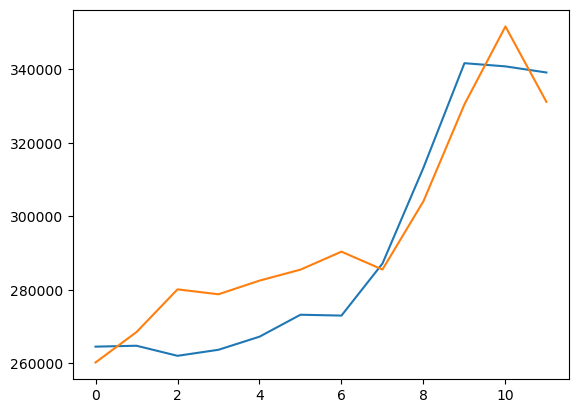

In [ ]:
print(train_scaled)
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
print(train_reshaped)
lstm_model.predict(train_reshaped, batch_size=1)

ref_predictions = list()
for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    print(yhat.shape)
    yhat = invert_scale(scaler, X, yhat)
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    ref_predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Year=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

rmse = sqrt(mean_squared_error(raw_values[-testNum:], ref_predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(raw_values[-testNum:], label="raw")
pyplot.plot(ref_predictions, label="prediction")
pyplot.show()

## 4.3 Refugee percentage with employment need

In [ ]:
df3=pd.read_csv("clean_Data_11.csv")
df3.head()

,Unnamed: 0,qn1d,qn1f,qn1c,qn1h,qn2b,qn4b,qn4c,qn4e,qn1jyear,ui_lpr,ui_work
0,1,998.0,2,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
1,2,998.0,1,2.500846,98,8.889072,2.589303,1.382965,1.585342,2014.0,13.358653,5.712727
2,3,7.0,2,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
3,4,8.0,1,2.500846,24,8.889072,2.589303,1.382965,1.585342,2016.0,13.358653,5.712727
4,5,30.0,2,4.000000,3,5.000000,2.000000,2.000000,2.000000,2018.0,2.000000,1.000000


In [ ]:
num=df3['ui_work'].value_counts()[1]
total=len(df3)
percentage=100 - num / total * 100
print(percentage)

66.29969418960245


## 4.4 Final Prediction
### Combining the multiple predictions

We have prediction of people already searching for jobs in the USA, for 2023-2033.
We have prediction of new refugees coming to USA for 2023-2034.
We also have a percentage for refugees who need jobs, from survey data.

We combine them to find out how many jobs need to be created, or planned for, by US government to help provide refugees (and locals) with jobs.

In [ ]:
Prediction_Years=list(range(2023,2034))
Prediction_df=pd.DataFrame(Prediction_Years, columns=['Year'])

predictions=[round(x) for x in predictions]
Prediction_df['LocalJobSearch']=list(predictions)

ref_predictions=[round(x) for x in ref_predictions]
Prediction_df['RefugeeTotal']=list(ref_predictions[0:11])

Prediction_df['RefugeeJobSearch']=round(Prediction_df['RefugeeTotal']*percentage/100)

Prediction_df['TotalJobNeed']=Prediction_df['LocalJobSearch']+Prediction_df['RefugeeJobSearch']

Prediction_df

,Year,LocalJobSearch,RefugeeTotal,RefugeeJobSearch,TotalJobNeed
0,2023,44468,260191,172506.0,216974.0
1,2024,44295,268475,177998.0,222293.0
2,2025,44131,280104,185708.0,229839.0
3,2026,43985,278769,184823.0,228808.0
4,2027,43840,282485,187287.0,231127.0
5,2028,43679,285480,189272.0,232951.0
6,2029,43520,290377,192519.0,236039.0
7,2030,43378,285509,189292.0,232670.0
8,2031,43214,304115,201627.0,244841.0
9,2032,43055,330497,219119.0,262174.0


# 5. Deployment

We have deployed the codes onto GitHub for the time being as there is a need to do further data collection, processing and modelling to produce a more accurate prediction of available jobs for refugees based on their education level and working experience. 


**Github Deployment**
https://github.com/JyLee98ImTrying/JobMarketDemandFulfillByRefugees 

# 6. Members Contribution 

In general, all members have been actively participating in all discussions and contributed accordingly based on their specialties.  

1. TOUHID CHOUDHURY -- 
        1. Primary Research Coordinator by Structuring, Spell- and Grammar-Checking all input in iPython Notebook by Members
        2. Proposed Research Direction and participated in discussing possible Modelling Techniques
        3. Provided direction for Data Collection
        
2. NAZMUS SAKIB
        1. Lead Coordinator for Data Collection and provided direction for Data Collection
        2. Engineer for Data Pre-processing and Cleaning
        3. Provided ideas for Research direction

3. LIU ZENING
        1. Lead Coordinator for EDA and provided direction for EDA
        2. Primary Engineer for EDA 
        3. Provided ideas and direction for Data Collection and Modelling 


4. ZHENG JIANGMENG
        1. Modelling Engineer & Interpreted Results from Models 
        2. Collaborated with LEE JIE YENG on the Modelling Part 
        3. Provided ideas and direction for Data Collection and Modelling 
         
5. LEE JIE YENG
        1. Assistant Research Coordinator, Modelling Engineer & Interpreted Results from Models 
        2. Collaborated with ZHENG JIANGMENG on the Modelling Part 
        3. Provided ideas and direction for Data Collection and Modelling 
